<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_Week_5_Assignment_5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Design a multi-layer ANN architecture with one input, one hidden, and one output
layer. Assume a linear activation function in the output layer and a sigmoid activation function
in the hidden layer.

• Write Python code for a backpropagation algorithm with gradient descent optimization to
update weights and bias parameters of the ANN model with training data shown in Table
1.

• Calculate the mean square error with training and testing data shown in Table 2.

• Write Python code that reads the input data [x1 and x2] from the user. Predict the output
with deployed ANN model
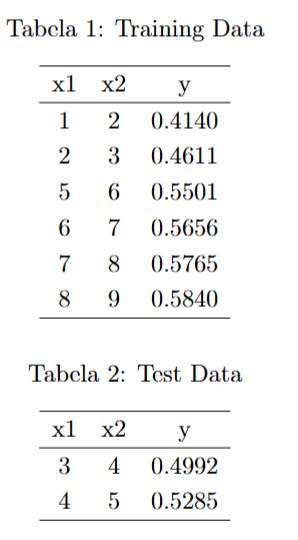

In [1]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

data = np.array([[1, 2, 0.4140], [2, 3, 0.4611], [5, 6, 0.5501], [6, 7, 0.5656], [7, 8, 0.5765], [8, 9, 0.5840]])
X_train, y_train = data[:, :2], data[:, 2:]
test_data = np.array([[3, 4, 0.4992], [4, 5, 0.5285]])
X_test, y_test = test_data[:, :2], test_data[:, 2:]

np.random.seed(0)
W1 = np.random.rand(2, 3)
b1 = np.random.rand(1, 3)
W2 = np.random.rand(3, 1)
b2 = np.random.rand(1, 1)

learning_rate = 0.1
epochs = 5000

for _ in range(epochs):
    hidden_input = np.dot(X_train, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    final_output = final_input
    error = y_train - final_output
    d_output = error
    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_output)
    W2 += np.dot(hidden_output.T, d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(X_train.T, d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

train_predictions = np.dot(sigmoid(np.dot(X_train, W1) + b1), W2) + b2
test_predictions = np.dot(sigmoid(np.dot(X_test, W1) + b1), W2) + b2
print(mse(y_train, train_predictions))
print(mse(y_test, test_predictions))

x1, x2 = map(float, input().split())
user_input = np.array([[x1, x2]])
user_output = np.dot(sigmoid(np.dot(user_input, W1) + b1), W2) + b2
print(user_output[0][0])

8.787942876749573e-06
9.624128530964148e-06
3 4
0.500124119474034
